In [1]:
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [3]:
rmse = lambda actual, predict: np.sqrt(np.mean((actual - predict)**2))

In [4]:
with open('appml-assignment1-dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
data['X'].keys()

Index(['date', 'CAD-open', 'CAD-high', 'CAD-low', 'CAD-close', 'CHF-open',
       'CHF-high', 'CHF-low', 'CHF-close', 'CNH-open',
       ...
       'VGK-low', 'VGK-close', 'VIX-open', 'VIX-high', 'VIX-low', 'VIX-close',
       'ZCN-open', 'ZCN-high', 'ZCN-low', 'ZCN-close'],
      dtype='object', length=189)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data['X'], data['y'], test_size=0.2, random_state=0)

In [7]:
x_train = x_train.drop(['date'], axis=1).to_numpy()
y_train = y_train.to_numpy()

In [8]:
x_test = x_test.drop(['date'], axis=1).to_numpy()
y_test = y_test.to_numpy()

In [9]:
x_train[np.where(np.isnan(x_train))] = 0.5
x_test[np.where(np.isnan(x_test))] = 0.5

In [10]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
x_train = np.append(np.ones([len(x_train), 1]), x_train, 1)
x_test = np.append(np.ones([len(x_test), 1]), x_test, 1)

In [12]:
sgd_regr = SGDRegressor(max_iter=1000, tol=1e-3).fit(x_train, y_train)
y_test_predict = sgd_regr.predict(x_test)

In [13]:
MSE = lambda actual, predict: np.mean((actual - predict)**2)

In [14]:
MSE(y_test, y_test_predict)

1.677778529481898e-06

(1000.0, 2000.0)

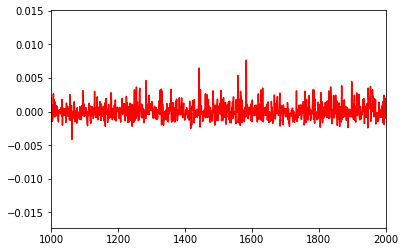

In [15]:
plt.plot(range(len(y_test)), y_test-y_test_predict, 'r')
plt.xlim([1000, 2000])